# Which tree species should the city plant?

## 📖 Background
You work for a nonprofit organization advising the planning department on ways to improve the quantity and quality of trees in New York City. The urban design team believes tree size (using trunk diameter as a proxy for size) and health are the most desirable characteristics of city trees.


## 💾 The data
The team has provided access to the 2015 tree census and geographical information on New York City neighborhoods ([trees](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh), [neighborhoods](https://data.cityofnewyork.us/City-Government/NTA-map/d3qk-pfyz)):

#### Tree Census
- "tree_id" - Unique id of each tree.
- "tree_dbh" - The diameter of the tree in inches measured at 54 inches above the ground.
- "curb_loc" - Location of the tree bed in relation to the curb. Either along the curb (OnCurb) or offset from the curb (OffsetFromCurb).
- "spc_common" - Common name for the species.
- "status" - Indicates whether the tree is alive or standing dead.
- "health" - Indication of the tree's health (Good, Fair, and Poor).
- "root_stone" - Indicates the presence of a root problem caused by paving stones in the tree bed.
- "root_grate" - Indicates the presence of a root problem caused by metal grates in the tree bed.
- "root_other" - Indicates the presence of other root problems.
- "trunk_wire" - Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunk.
- "trnk_light" - Indicates the presence of a trunk problem caused by lighting installed on the tree.
- "trnk_other" - Indicates the presence of other trunk problems.
- "brch_light" - Indicates the presence of a branch problem caused by lights or wires in the branches.
- "brch_shoe" - Indicates the presence of a branch problem caused by shoes in the branches.
- "brch_other" - Indicates the presence of other branch problems.
- "postcode" - Five-digit zip code where the tree is located.
- "nta" - Neighborhood Tabulation Area (NTA) code from the 2010 US Census for the tree.
- "nta_name" - Neighborhood name.
- "latitude" - Latitude of the tree, in decimal degrees.
- "longitude" - Longitude of the tree, in decimal degrees.

#### Neighborhoods' geographical information
- "ntacode" - NTA code (matches Tree Census information).
- "ntaname" - Neighborhood name (matches Tree Census information).
- "geometry" - Polygon that defines the neighborhood.

_Tree census and neighborhood information from the City of New York [NYC Open Data](https://opendata.cityofnewyork.us/data/)._

In [3]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import seaborn as sns

trees = pd.read_csv('data/trees.csv')

In [37]:
neighborhoods = gpd.read_file('data/nta.shp')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
trees = trees.dropna()

In [10]:
trees = trees.drop(columns = ['status'])

In [12]:
trees['health_grade'] = trees['health'].apply(lambda s: 0 if s == "Poor" else(
                                        0.5 if s == "Fair" else 1))

In [13]:
bool_columns = ['root_stone','root_grate', 'root_other', 'trunk_wire', 'trnk_light', 
                'trnk_other','brch_light', 'brch_shoe', 'brch_other']
trees[bool_columns] = trees[bool_columns] == 'Yes'

In [14]:
trees['total_problems'] = trees[bool_columns].sum(axis=1)

## Tree species in Manhattan

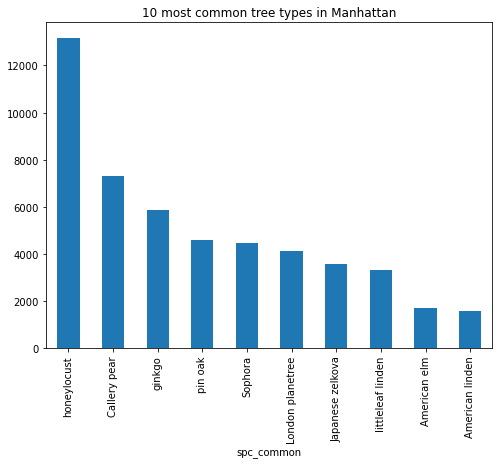

In [38]:
plt.rcParams['figure.figsize'] = [8, 6]
trees.groupby('spc_common').size().sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.title('10 most common tree types in Manhattan')
plt.show()

The 10 most common types of tree in Manhattan are:

1. honeylocust
2. callery pear
3. ginkgo
4. pin oak
5. sophora
6. london planetree
7. littleleaf linden
8. amerian elm
9. american linden

## Districts with most trees

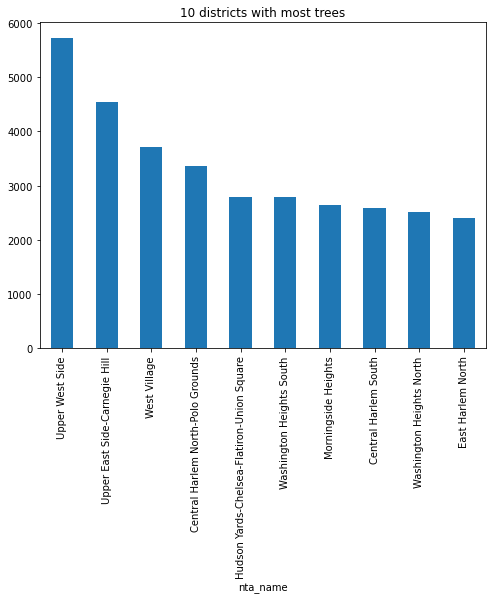

In [39]:
plt.rcParams['figure.figsize'] = [8, 6]
top_10_districts = trees.groupby('nta_name').size().sort_values(ascending=False).head(10)
top_10_districts.plot(kind = 'bar')
plt.title('10 districts with most trees')
plt.x_
plt.show()

The 10 districts in Manhattan with most trees are:

1. Upper West Side
2. Upper East Side-Carnegie Hill
3. West Village
4. Central Harlem North-Polo Grounds
5. Hudson Yards-Chelsea-Flatiron-Union Square
6. Washington Heights South
7. Morningside Heights
8. Central Harlem South
9. Washington Heights North
10. East Harlem North

## Manhattan's neighborhoods and tree locations

In [18]:
manhattan_neighborhoods = neighborhoods[neighborhoods.boroname == 'Manhattan']

Text(0.5, 1.0, "Manhattan's neighborhoods and tree locations")

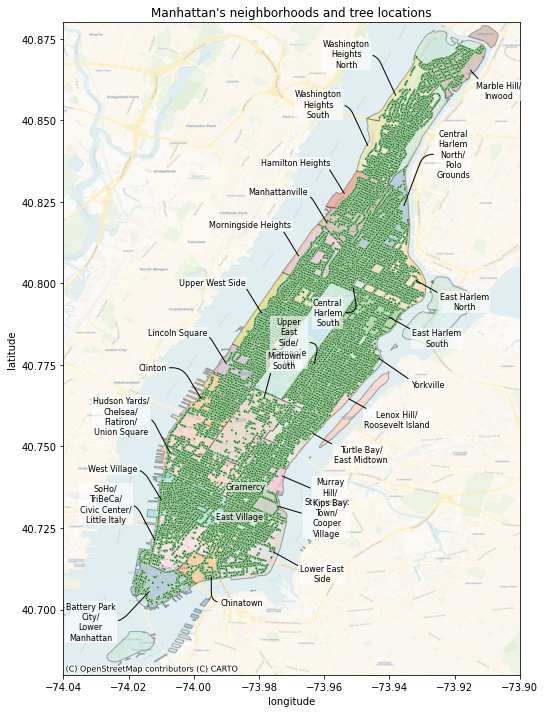

In [20]:
plt.rcParams['figure.figsize'] = [15, 12]
ax = manhattan_neighborhoods.plot(column = 'ntaname', alpha = 0.3, edgecolor='black', cmap = 'tab20')

sns.scatterplot(data = trees, x = 'longitude', y = 'latitude', 
                marker = '.', size = 0.05, alpha = 0.7, 
                color = 'darkgreen', ax = ax, legend = False)

for index, row in manhattan_neighborhoods.iterrows():
    x = row.geometry.centroid.x
    y = row.geometry.centroid.y
    xytext = (0,0)
    text = row['ntaname']
    arrowstyle = "-"
    connectionstyle = "arc,angleA=180,armA=30,rad=10"
    
    
    # Wrapping texts
    if text == 'Central Harlem North-Polo Grounds':
        text = 'Central\nHarlem\nNorth/\nPolo\nGrounds'
        xytext = (50,30)
        x = x + 0.005
        y = y + 0.005
        connectionstyle = "arc,angleA=180,armA=30,rad=10"
        
    elif text == 'SoHo-TriBeCa-Civic Center-Little Italy':
        text = 'SoHo/\nTriBeCa/\nCivic Center/\nLittle Italy'
        xytext = (-50,20)
        x = x - 0.007
        y = y
        connectionstyle = "arc,angleA=0,armA=30,rad=10"
        
    elif text == 'Central Harlem South':
        text = 'Central\nHarlem\nSouth'
        xytext = (-25,-40)
        x = x 
        y = y - 0.005
        connectionstyle = "arc,angleA=0,armA=30,rad=10"
        
    elif text == 'East Harlem North':
        text = 'East Harlem\nNorth'
        xytext = (50,-30)
        x = x + 0.005
        y = y
        connectionstyle = "arc,angleA=180,armA=10,rad=10"
        
    elif text == 'East Harlem South':
        text = 'East Harlem\nSouth'
        xytext = (50,-30)
        x = x + 0.005
        y = y
        connectionstyle = "arc,angleA=180,armA=10,rad=10"
        
    elif text == 'Hudson Yards-Chelsea-Flatiron-Union Square':
        text = 'Hudson Yards/\nChelsea/\nFlatiron/\nUnion Square'
        xytext = (-50,20)
        x = x - 0.008
        y = y
        connectionstyle = "arc,angleA=0,armA=30,rad=10"
        
    elif text == 'Marble Hill-Inwood':
        text = 'Marble Hill/\nInwood'
        xytext = (30,-30)
        x = x + 0.002
        y = y - 0.002
        connectionstyle = "arc,angleA=180,armA=10,rad=10"
        
    elif text == 'Washington Heights South':
        text = 'Washington\nHeights\nSouth'
        xytext = (-50,30)
        x = x - 0.005
        y = y
        connectionstyle = "arc,angleA=0,armA=30,rad=10"
        
    elif text == 'Washington Heights North':
        text = 'Washington\nHeights\nNorth'
        xytext = (-50,30)
        x = x - 0.005
        y = y
        connectionstyle = "arc,angleA=0,armA=30,rad=10"
                
    elif text == 'Midtown-Midtown South':
        text = 'Midtown\nSouth'
        xytext = (20,30)
        x = x + 0.005
        y = y + 0.009
        connectionstyle = "arc,angleA=180,armA=10,rad=10"
        
    elif text == 'Lenox Hill-Roosevelt Island':
        text = 'Lenox Hill/\nRoosevelt Island'
        xytext = (50,-30)
        x = x + 0.002
        y = y
        connectionstyle = "arc,angleA=180,armA=10,rad=10"
        
    elif text == 'Upper East Side-Carnegie Hill':
        text = 'Upper\nEast\nSide/\nCarnegie\nHill'
        xytext = (-25,0)
        x = x - 0.002
        y = y
        connectionstyle = "arc,angleA=0,armA=30,rad=10"
    
    elif text in ['Lincoln Square', 'Clinton', 'Upper West Side', 'Manhattanville',
                 'Morningside Heights', 'Hamilton Heights']:
        xytext = (-50,30)
        x = x - 0.005
        y = y
        connectionstyle = "arc,angleA=0,armA=30,rad=10"

    elif text == 'West Village':
        xytext = (-50,30)
        x = x - 0.008
        y = y
        connectionstyle = "arc,angleA=0,armA=30,rad=10"
        
    elif text == 'Turtle Bay-East Midtown':
        text = 'Turtle Bay/\nEast Midtown'
        xytext = (50,-30)
        x = x + 0.005
        y = y
        connectionstyle = "arc,angleA=180,armA=10,rad=10"
        
    elif text == 'Murray Hill-Kips Bay':
        text = 'Murray\nHill/\nKips Bay'
        xytext = (50,-30)
        x = x + 0.004
        y = y - 0.003
        connectionstyle = "arc,angleA=180,armA=10,rad=10"
        
    elif text == 'Stuyvesant Town-Cooper Village':
        text = 'Stuyvesant\nTown/\nCooper\nVillage'
        xytext = (50,-30)
        x = x + 0.002
        y = y
        connectionstyle = "arc,angleA=180,armA=10,rad=10"
        
    elif text == 'Battery Park City-Lower Manhattan':
        text = 'Battery Park\nCity/\nLower\nManhattan'
        xytext = (-60,-50)
        x = x - 0.003
        y = y - 0.002
        connectionstyle = "arc,angleA=0,armA=30,rad=10"
    
    elif text == 'Yorkville':
        xytext = (50,-30)
        x = x + 0.005
        y = y
        connectionstyle = "arc,angleA=180,armA=10,rad=10"
        
    elif text == 'Lower East Side':
        text = 'Lower East\nSide'
        xytext = (50,-30)
        x = x + 0.005
        y = y
        connectionstyle = "arc,angleA=180,armA=10,rad=10"
        
    elif text == 'Chinatown':
        xytext = (30,-30)
        x = x
        y = y - 0.005
        connectionstyle = "arc,angleA=180,armA=30,rad=10"
    
    arrowprops=dict(arrowstyle=arrowstyle,
                    connectionstyle=connectionstyle)
    if text in ['park-cemetery-etc-Manhattan', 'Gramercy', 'East Village']:
        arrowprops = None
        
    if text == 'park-cemetery-etc-Manhattan':
        text = ""
        
    plt.annotate(text=text, xy=(x,y), xytext = xytext, alpha = 1,
                horizontalalignment='center', size = 8, textcoords='offset points',
                bbox={'facecolor': 'white', 'alpha':0.6, 'pad': 1, 'edgecolor':'none'},
                arrowprops=arrowprops)
    
plt.xlim(-74.04,-73.9)
plt.ylim(40.68, 40.88)
ctx.add_basemap(ax, zoom=14, crs='EPSG:4326', source=ctx.providers.CartoDB.Voyager, alpha = 0.7)
plt.title("Manhattan's neighborhoods and tree locations")

## What ten tree species would you recommend the city plant in the future?

In [24]:
trees[['tree_id', 'tree_dbh', 'curb_loc', 'spc_common', 'total_problems']]

,tree_id,tree_dbh,curb_loc,spc_common,total_problems
0,190422,11,OnCurb,honeylocust,0
1,190426,11,OnCurb,honeylocust,0
2,208649,9,OnCurb,American linden,1
3,193310,14,OnCurb,honeylocust,3
4,199760,4,OnCurb,willow oak,0
...,...,...,...,...,...
64224,208765,11,OnCurb,honeylocust,1
64225,170513,9,OnCurb,honeylocust,0
64226,190040,10,OnCurb,honeylocust,0
64227,191269,12,OnCurb,ginkgo,0


In [25]:
tree_count_per_type = trees.spc_common.value_counts()

In [26]:
print("Trees species:",len(tree_count_per_type))
print("Trees species with more than 100 planted trees:", len(tree_count_per_type[tree_count_per_type > 100]))

Trees species: 128
Trees species with more than 100 planted trees: 40


For a more statistically relevant analysis, we will consider only the tree species with at least 100 planted trees in Manhattan.

In [27]:
selected_trees = trees[trees.spc_common.isin(tree_count_per_type[tree_count_per_type > 100].index)]

In [36]:
import warnings
warnings.filterwarnings('ignore')
overview = selected_trees.groupby('spc_common')['tree_dbh','health_grade', 'total_problems'].mean()

In [29]:
overview

,tree_dbh,health_grade,total_problems
spc_common,,,
'Schubert' chokecherry,4.901840,0.803681,0.478528
American elm,13.899293,0.877797,0.428740
American linden,6.959570,0.764056,0.499052
Callery pear,8.681376,0.838564,0.642045
Chinese elm,7.610191,0.857962,0.464968
English oak,5.507614,0.868020,0.355330
European hornbeam,4.041916,0.835329,0.095808
Japanese tree lilac,5.651163,0.806202,0.658915
Japanese zelkova,7.037542,0.857202,0.511958


Text(0.5, 1.0, 'Total Health grade x Total problems rate per species')

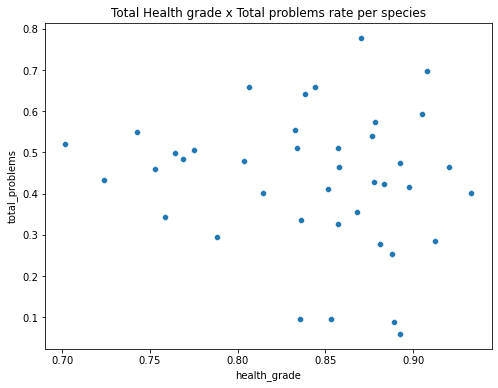

In [30]:
plt.rcParams['figure.figsize'] = [8, 6]
sns.scatterplot(data = overview, y = 'total_problems', x = 'health_grade')
plt.title('Total Health grade x Total problems rate per species')

Text(0.5, 1.0, 'Trunk diameter x Health grade per species')

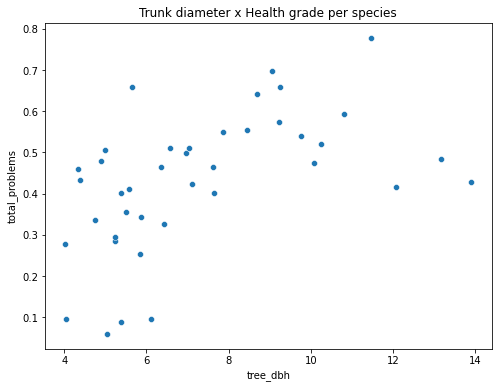

In [31]:
plt.rcParams['figure.figsize'] = [8, 6]
sns.scatterplot(data = overview, y = 'total_problems', x = 'tree_dbh')
plt.title('Trunk diameter x Health grade per species')

There's a strong correlation between the tree trunk diameter and the average problems caused by it. For this reason, we will create a "tree_dbh_score" column based on the total problems caused by it.

tree_dbh_score = tree_dbh * (1 - total_problems) --- normalized from 0-1



In [32]:
overview['tree_dbh_score'] = overview['tree_dbh'] * (1-overview['total_problems'])
overview['tree_dbh_score'] = overview['tree_dbh_score']/overview['tree_dbh_score'].max()

In [33]:
overview["final_score"] = overview.health_grade + overview.tree_dbh_score

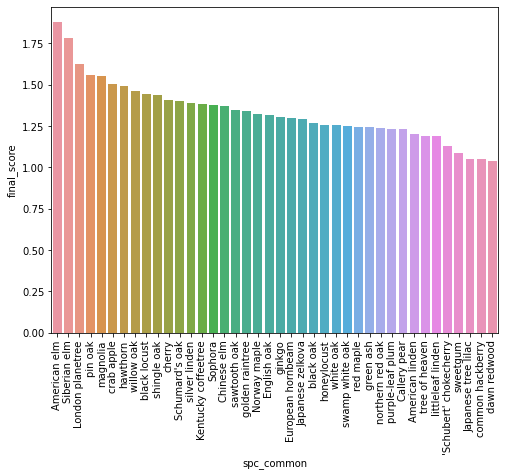

In [34]:
sns.barplot(data = overview, x = overview.index, y = 'final_score',
           order=overview.sort_values('final_score', ascending = False).index)
plt.xticks(rotation = 90)
plt.show()

In [35]:
overview.sort_values('final_score', ascending = False).head(10).index

Index(['American elm', 'Siberian elm', 'London planetree', 'pin oak',
       'magnolia', 'crab apple', 'hawthorn', 'willow oak', 'black locust',
       'shingle oak'],
      dtype='object', name='spc_common')

Based on the final score of each species, the 10 recommended species are:

- American elm
- Siberian elm
- London planetree
- pin oak
- magnolia
- crab apple
- hawthorn
- willow oak
- black locust
- shingle oak